## InfoVis - Visualization Guidelines for Big Data Representation

In this notebook, we will make use of the **ENEM 2019 dataset** to try to become Big Data visualizable, applying different techniques found in the literature and used for the processing/transformation of Big Data to Small Data. In the end, a visualization will be created to achieve the purpose.

**Dataset** from: https://www.kaggle.com/saraivaufc/enem-2019.

Following data reduction techniques will be used:

Exemplo 1) Numerosity Reduction > Non-Parametric Methods > **Histogram**

<br />

Members: Natália Penso, Suelen Santos, Lucas Tavares e Rychard Goltara. <br />
Professor: Marcelo Schots.

In [2]:
# importing libs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

## Preprocessing

In [3]:
filename = r"C:\Users\Suelen\Downloads\MICRODADOS_ENEM_2019.csv"

pd.options.display.max_columns = None
df = pd.read_csv(filename, sep=";", encoding="ISO-8859-1", chunksize=1000000)
df = pd.concat(df, ignore_index=True)

In [4]:
df.head(15)

NU_INSCRICAO  NU_ANO  CO_MUNICIPIO_RESIDENCIA     NO_MUNICIPIO_RESIDENCIA  \
0   190001004627    2019                  1506807                    Santarém   
1   190001004628    2019                  1504059                  Mãe do Rio   
2   190001004629    2019                  1505502                 Paragominas   
3   190001004630    2019                  1507706  São Sebastião da Boa Vista   
4   190001004631    2019                  1503903                      Juruti   
5   190001004632    2019                  1500800                  Ananindeua   
6   190001004633    2019                  1504208                      Marabá   
7   190001004634    2019                  1501402                       Belém   
8   190001004635    2019                  1503606                    Itaituba   
9   190001004636    2019                  1507607         São Miguel do Guamá   
10  190001004637    2019                  1506609         Santa Maria do Pará   
11  190001004638    2019                  1508100                     Tucuruí   
12  190001004639    2019                  1500800                  Ananindeua   
13  190001004640    2019                  1501402                       Belém   
14  190001004641    2019                  1500800                  Ananindeua   

    CO_UF_RESIDENCIA SG_UF_RESIDENCIA  NU_IDADE TP_SEXO  TP_ESTADO_CIVIL  \
0                 15               PA        21       M                1   
1                 15               PA        16       F                1   
2                 15               PA        18       F                1   
3                 15               PA        23       M                0   
4                 15               PA        23       M                1   
5                 15               PA        31       M                1   
6                 15               PA        30       F                2   
7                 15               PA        26       F                0   
8                 15               PA        19       M                1   
9                 15               PA        17       F                1   
10                15               PA        21       M                1   
11                15               PA        24       F                0   
12                15               PA        22       M                1   
13                15               PA        31       M                1   
14                15               PA        29       F                1   

    TP_COR_RACA  TP_NACIONALIDADE  CO_MUNICIPIO_NASCIMENTO  \
0             3                 4                      NaN   
1             3                 1                1505502.0   
2             1                 1                1505502.0   
3             3                 1                1501402.0   
4             3                 1                1503903.0   
5             1                 1                1501402.0   
6             3                 1                1504208.0   
7             3                 1                1501204.0   
8             3                 1                1503606.0   
9             2                 2                      NaN   
10            0                 1                1506609.0   
11            3                 1                1505809.0   
12            3                 1                1501402.0   
13            3                 1                1504901.0   
14            3                 1                5300108.0   

   NO_MUNICIPIO_NASCIMENTO  CO_UF_NASCIMENTO SG_UF_NASCIMENTO  \
0                      NaN               NaN              NaN   
1              Paragominas              15.0               PA   
2              Paragominas              15.0               PA   
3                    Belém              15.0               PA   
4                   Juruti              15.0               PA   
5                    Belém              15.0               PA   
6                   Marabá              15

In [5]:
# lines and columns number

df.shape

(5095270, 136)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5095270 entries, 0 to 5095269
Columns: 136 entries, NU_INSCRICAO to Q025
dtypes: float64(24), int64(71), object(41)
memory usage: 5.2+ GB


In [6]:
# To see columns with NaN value

df["NU_NOTA_CN"].isna().any()

True

In [7]:
# Picking up only columns that will be used - creates the small dataframe used for this project

small_df = df[["SG_UF_PROVA", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]]
small_df

SG_UF_PROVA  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
0                PA       472.9       466.0       497.3       369.1   
1                PA       358.9       495.4       482.3       416.5   
2                PA       574.2       538.7       582.6       571.5   
3                PA         NaN         NaN         NaN         NaN   
4                PA         NaN         NaN         NaN         NaN   
...             ...         ...         ...         ...         ...   
5095265          BA         NaN         NaN         NaN         NaN   
5095266          BA         NaN         NaN         NaN         NaN   
5095267          BA         NaN         NaN         NaN         NaN   
5095268          BA       458.8       380.6       493.1       396.7   
5095269          BA       451.6       473.5       473.2       470.2   

         NU_NOTA_REDACAO  
0                  780.0  
1                  600.0  
2                  640.0  
3                    NaN  
4                    NaN  
...                  ...  
5095265              NaN  
5095266              NaN  
5095267              NaN  
5095268            800.0  
5095269            280.0  

[5095270 rows x 6 columns]

In [8]:
small_df.describe()

NU_NOTA_CN    NU_NOTA_CH    NU_NOTA_LC    NU_NOTA_MT  NU_NOTA_REDACAO
count  3.710433e+06  3.923145e+06  3.923145e+06  3.710433e+06     3.923144e+06
mean   4.778241e+02  5.072487e+02  5.205177e+02  5.231241e+02     5.711883e+02
std    7.609774e+01  8.241163e+01  6.415065e+01  1.090637e+02     1.887633e+02
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00     0.000000e+00
25%    4.178000e+02  4.479000e+02  4.835000e+02  4.351000e+02     4.800000e+02
50%    4.703000e+02  5.106000e+02  5.262000e+02  5.011000e+02     5.800000e+02
75%    5.332000e+02  5.666000e+02  5.653000e+02  5.978000e+02     6.800000e+02
max    8.609000e+02  8.351000e+02  8.017000e+02  9.855000e+02     1.000000e+03

In [8]:
small_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5095270 entries, 0 to 5095269
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   SG_UF_PROVA      object 
 1   NU_NOTA_CN       float64
 2   NU_NOTA_CH       float64
 3   NU_NOTA_LC       float64
 4   NU_NOTA_MT       float64
 5   NU_NOTA_REDACAO  float64
dtypes: float64(5), object(1)
memory usage: 233.2+ MB


In [9]:
# Total of NaNs existing in each grade column (small)
# Remembering that a row can have more than one NaN, i.e., in one or more grades.

count_nan_in_small_df = small_df.isnull().sum()
print (count_nan_in_small_df)

SG_UF_PROVA              0
NU_NOTA_CN         1384837
NU_NOTA_CH         1172125
NU_NOTA_LC         1172125
NU_NOTA_MT         1384837
NU_NOTA_REDACAO    1172126
dtype: int64


In [10]:
# Total of NaN in small dataframe
# Only accounted for the total of NaNs existing in each column (grades), that represents /
# the NaNs existing in the entire small dataframe

count_nan_in_small_df = small_df.isnull().sum().sum()
print ("Count of NaN: " + str(count_nan_in_small_df))

Count of NaN: 6286050


In [11]:
# Take all rows with NaN

nan = small_df[small_df.isnull().any(axis=1)]

nan.head(17)

SG_UF_PROVA  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
3           PA         NaN         NaN         NaN         NaN   
4           PA         NaN         NaN         NaN         NaN   
11          PA         NaN         NaN         NaN         NaN   
12          PA         NaN         NaN         NaN         NaN   
13          PA         NaN         NaN         NaN         NaN   
14          PA         NaN         NaN         NaN         NaN   
25          PA         NaN         NaN         NaN         NaN   
42          PA         NaN         NaN         NaN         NaN   
44          PA         NaN         NaN         NaN         NaN   
47          PA         NaN       409.3       375.3         NaN   
55          PA         NaN         NaN         NaN         NaN   
58          PA         NaN         NaN         NaN         NaN   
59          PA         NaN       394.2       412.1         NaN   
64          PA         NaN         NaN         NaN         NaN   
73          PA         NaN         NaN         NaN         NaN   
74          PA         NaN       387.4       375.5         NaN   
85          PA         NaN         NaN         NaN         NaN   

    NU_NOTA_REDACAO  
3               NaN  
4               NaN  
11              NaN  
12              NaN  
13              NaN  
14              NaN  
25              NaN  
42              NaN  
44              NaN  
47            400.0  
55              NaN  
58              NaN  
59            520.0  
64              NaN  
73              NaN  
74            400.0  
85              NaN

In [12]:
# This row represents the total of candidates that will be removed from the small dataset due to the NaN (Not a Number) value

nan.shape

(1393263, 6)

### - To understand why we will remove NaN rows from the small dataset previous created 

In [13]:
# Take columns related to the candidates' presence to the ENEM tests

df_presence = df[["TP_PRESENCA_CN", "TP_PRESENCA_CH", "TP_PRESENCA_LC", "TP_PRESENCA_MT"]]
df_presence

TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  TP_PRESENCA_MT
0                     1               1               1               1
1                     1               1               1               1
2                     1               1               1               1
3                     0               0               0               0
4                     0               0               0               0
...                 ...             ...             ...             ...
5095265               0               0               0               0
5095266               0               0               0               0
5095267               0               0               0               0
5095268               1               1               1               1
5095269               1               1               1               1

[5095270 rows x 4 columns]

In [14]:
# Faltantes = 0
# Presentes = 1
# Eliminados = 2 per grade

print(df_presence["TP_PRESENCA_CN"].value_counts()) # faltantes + eliminados = 1384837
print(df_presence["TP_PRESENCA_CH"].value_counts()) # faltantes + eliminados = 1172125
print(df_presence["TP_PRESENCA_LC"].value_counts()) # faltantes + eliminados = 1172125
print(df_presence["TP_PRESENCA_MT"].value_counts()) # faltantes + eliminados = 1384837

1    3710433
0    1382925
2       1912
Name: TP_PRESENCA_CN, dtype: int64
1    3923145
0    1168053
2       4072
Name: TP_PRESENCA_CH, dtype: int64
1    3923145
0    1168053
2       4072
Name: TP_PRESENCA_LC, dtype: int64
1    3710433
0    1382925
2       1912
Name: TP_PRESENCA_MT, dtype: int64


In [15]:
# Example made in https://www.kaggle.com/saraivaufc/starter-enem-2019 
# that allows to create a table based on the results obtained in the previous cell

def build_table(df, index, colunms):
    df2 = df[index.keys()]

    pieces = []
    for col in df2.columns:
        tmp_series = df2[col].value_counts()
        tmp_series.name = col
        pieces.append(tmp_series)
    df_value_counts = pd.concat(pieces, axis=1)

    df_t = df_value_counts.T
    df_t.rename(columns=colunms, 
                index=index, inplace=True)

    return df_t


index = {
    "TP_PRESENCA_CN": "Presença na prova objetiva de Ciências da Natureza",
    "TP_PRESENCA_CH": "Presença na prova objetiva de Ciências Humanas",
    "TP_PRESENCA_LC": "Presença na prova objetiva de Linguagens e Códigos",
    "TP_PRESENCA_MT": "Presença na prova objetiva de Matemática"
}

build_table(df_presence, index, {0: 'Faltou à prova', 1: 'Presente na prova', 2: 'Eliminado na prova'})

Presente na prova  \
Presença na prova objetiva de Ciências da Natureza            3710433   
Presença na prova objetiva de Ciências Humanas                3923145   
Presença na prova objetiva de Linguagens e Códigos            3923145   
Presença na prova objetiva de Matemática                      3710433   

                                                    Faltou à prova  \
Presença na prova objetiva de Ciências da Natureza         1382925   
Presença na prova objetiva de Ciências Humanas             1168053   
Presença na prova objetiva de Linguagens e Códigos         1168053   
Presença na prova objetiva de Matemática                   1382925   

                                                    Eliminado na prova  
Presença na prova objetiva de Ciências da Natureza                1912  
Presença na prova objetiva de Ciências Humanas                    4072  
Presença na prova objetiva de Linguagens e Códigos                4072  
Presença na prova objetiva de Matemática                          1912

In [16]:
# Creates new dataframe to understand NaN values with candidate status in each test (if missed or was eliminated)

df_explanation = df[["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO", "TP_PRESENCA_CN", 
                     "TP_PRESENCA_CH", "TP_PRESENCA_LC", "TP_PRESENCA_MT"]]
df_explanation

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO  \
0             472.9       466.0       497.3       369.1            780.0   
1             358.9       495.4       482.3       416.5            600.0   
2             574.2       538.7       582.6       571.5            640.0   
3               NaN         NaN         NaN         NaN              NaN   
4               NaN         NaN         NaN         NaN              NaN   
...             ...         ...         ...         ...              ...   
5095265         NaN         NaN         NaN         NaN              NaN   
5095266         NaN         NaN         NaN         NaN              NaN   
5095267         NaN         NaN         NaN         NaN              NaN   
5095268       458.8       380.6       493.1       396.7            800.0   
5095269       451.6       473.5       473.2       470.2            280.0   

         TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  TP_PRESENCA_MT  
0                     1               1               1               1  
1                     1               1               1               1  
2                     1               1               1               1  
3                     0               0               0               0  
4                     0               0               0               0  
...                 ...             ...             ...             ...  
5095265               0               0               0               0  
5095266               0               0               0               0  
5095267               0               0               0               0  
5095268               1               1               1               1  
5095269               1               1               1               1  

[5095270 rows x 9 columns]

In [17]:
# From the previous result, only those containing NaN value remain.
# It is important to note that there are candidates who have attended at least one exam. For this reason 
# the result of the table contains values 1.

df_explanation_with_nan = df_explanation[df_explanation.isnull().any(axis=1)]
df_explanation_with_nan.head(17)

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO  \
3          NaN         NaN         NaN         NaN              NaN   
4          NaN         NaN         NaN         NaN              NaN   
11         NaN         NaN         NaN         NaN              NaN   
12         NaN         NaN         NaN         NaN              NaN   
13         NaN         NaN         NaN         NaN              NaN   
14         NaN         NaN         NaN         NaN              NaN   
25         NaN         NaN         NaN         NaN              NaN   
42         NaN         NaN         NaN         NaN              NaN   
44         NaN         NaN         NaN         NaN              NaN   
47         NaN       409.3       375.3         NaN            400.0   
55         NaN         NaN         NaN         NaN              NaN   
58         NaN         NaN         NaN         NaN              NaN   
59         NaN       394.2       412.1         NaN            520.0   
64         NaN         NaN         NaN         NaN              NaN   
73         NaN         NaN         NaN         NaN              NaN   
74         NaN       387.4       375.5         NaN            400.0   
85         NaN         NaN         NaN         NaN              NaN   

    TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  TP_PRESENCA_MT  
3                0               0               0               0  
4                0               0               0               0  
11               0               0               0               0  
12               0               0               0               0  
13               0               0               0               0  
14               0               0               0               0  
25               0               0               0               0  
42               0               0               0               0  
44               0               0               0               0  
47               0               1               1               0  
55               0               0               0               0  
58               0               0               0               0  
59               0               1               1               0  
64               0               0               0               0  
73               0               0               0               0  
74               0               1               1               0  
85               0               0               0               0

In [18]:
df_explanation_with_nan.shape

(1393263, 9)

In [19]:
# Shows the status of candidates who have NaN in their cells, according to the previous result.
# If you sum each row values of this table, the result will be exactly the total of NaN rows present
# in the small dataset that we intend to remove, i.e., 1.393.263 candidates.

build_table(df_explanation_with_nan, index, {0: 'Faltou à prova', 1: 'Presente na prova', 2: 'Eliminado na prova'})

Faltou à prova  \
Presença na prova objetiva de Ciências da Natureza         1382925   
Presença na prova objetiva de Ciências Humanas             1168053   
Presença na prova objetiva de Linguagens e Códigos         1168053   
Presença na prova objetiva de Matemática                   1382925   

                                                    Presente na prova  \
Presença na prova objetiva de Ciências da Natureza               8426   
Presença na prova objetiva de Ciências Humanas                 221138   
Presença na prova objetiva de Linguagens e Códigos             221138   
Presença na prova objetiva de Matemática                         8426   

                                                    Eliminado na prova  
Presença na prova objetiva de Ciências da Natureza                1912  
Presença na prova objetiva de Ciências Humanas                    4072  
Presença na prova objetiva de Linguagens e Códigos                4072  
Presença na prova objetiva de Matemática                          1912

In [20]:
print(df_explanation_with_nan["TP_PRESENCA_CN"].value_counts().sum())
print(df_explanation_with_nan["TP_PRESENCA_CH"].value_counts().sum())
print(df_explanation_with_nan["TP_PRESENCA_LC"].value_counts().sum())
print(df_explanation_with_nan["TP_PRESENCA_MT"].value_counts().sum())

1393263
1393263
1393263
1393263


In [21]:
# Explanation of the dataframe without rows with NaN values, showing that only candidates who 
# actually attended the ENEM remained in the dataset.

df_explanation_without_nan = df_explanation.dropna()
df_explanation_without_nan = df_explanation_without_nan.reset_index(drop = True)

df_explanation_without_nan.head(20)

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO  \
0        472.9       466.0       497.3       369.1            780.0   
1        358.9       495.4       482.3       416.5            600.0   
2        574.2       538.7       582.6       571.5            640.0   
3        522.0       592.6       582.0       605.3            580.0   
4        407.4       480.1       464.3       581.5            360.0   
5        369.7       398.2       395.6       473.8            480.0   
6        370.7       386.4       354.2       375.5            460.0   
7        443.5       432.4       515.3       397.0            540.0   
8        477.6       596.9       549.7       583.2            900.0   
9        376.4       354.7       525.8       389.4            660.0   
10       423.0       372.8       488.7       516.5            540.0   
11       373.3       405.2       441.4       496.5            700.0   
12       451.8       521.0       538.4       560.8            500.0   
13       463.6       417.3       431.0       397.9            620.0   
14       425.6       381.9       420.1       381.3            480.0   
15       559.2       595.5       556.9       585.2            800.0   
16       682.0       669.1       640.9       801.9            920.0   
17       503.2       546.7       551.8       436.8            680.0   
18       412.5       417.2       485.1       446.2            580.0   
19       546.6       589.7       578.4       650.3            620.0   

    TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  TP_PRESENCA_MT  
0                1               1               1               1  
1                1               1               1               1  
2                1               1               1               1  
3                1               1               1               1  
4                1               1               1               1  
5                1               1               1               1  
6                1               1               1               1  
7                1               1               1               1  
8                1               1               1               1  
9                1               1               1               1  
10               1               1               1               1  
11               1               1               1               1  
12               1               1               1               1  
13               1               1               1               1  
14               1               1               1               1  
15               1               1               1               1  
16               1               1               1               1  
17               1               1               1               1  
18               1               1               1               1  
19               1               1               1               1

In [22]:
build_table(df_explanation_without_nan, index, {0: 'Faltou à prova', 1: 'Presente na prova', 2: 'Eliminado na prova'})

Presente na prova
Presença na prova objetiva de Ciências da Natureza            3702007
Presença na prova objetiva de Ciências Humanas                3702007
Presença na prova objetiva de Linguagens e Códigos            3702007
Presença na prova objetiva de Matemática                      3702007

### It is important to highlight that candidates are being removed from the small dataframe who have missed all the four tests, or have missed one or more tests, or have been eliminated due to some rule, as seen in the results of the previous cells. Therefore, the dataframe that we will be used only shows the grades of candidates who attended all the tests and did not break any rules, since our purpose is to evaluate the performance of students in the ENEM tests, also considering each region of Brazil.

In [23]:
# Removing NaN values from SMALL DATAFRAME used for this project
# Reference: https://towardsdatascience.com/whats-the-best-way-to-handle-nan-values-62d50f738fc

small_df = small_df.dropna()
  
# To reset the indices  
small_df = small_df.reset_index(drop = True)
  
small_df

SG_UF_PROVA  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
0                PA       472.9       466.0       497.3       369.1   
1                PA       358.9       495.4       482.3       416.5   
2                PA       574.2       538.7       582.6       571.5   
3                PA       522.0       592.6       582.0       605.3   
4                PA       407.4       480.1       464.3       581.5   
...             ...         ...         ...         ...         ...   
3702002          BA       486.7       457.8       506.7       488.5   
3702003          BA       454.2       542.7       599.3       504.7   
3702004          BA       450.4       469.0       515.7       552.0   
3702005          BA       458.8       380.6       493.1       396.7   
3702006          BA       451.6       473.5       473.2       470.2   

         NU_NOTA_REDACAO  
0                  780.0  
1                  600.0  
2                  640.0  
3                  580.0  
4                  360.0  
...                  ...  
3702002            280.0  
3702003            400.0  
3702004            580.0  
3702005            800.0  
3702006            280.0  

[3702007 rows x 6 columns]

In [24]:
print(small_df["NU_NOTA_CN"].isna().any())
print(small_df["NU_NOTA_CH"].isna().any())
print(small_df["NU_NOTA_LC"].isna().any())
print(small_df["NU_NOTA_MT"].isna().any())
print(small_df["NU_NOTA_REDACAO"].isna().any())

False
False
False
False
False


In [25]:
small_df.describe()

NU_NOTA_CN    NU_NOTA_CH    NU_NOTA_LC    NU_NOTA_MT  NU_NOTA_REDACAO
count  3.702007e+06  3.702007e+06  3.702007e+06  3.702007e+06     3.702007e+06
mean   4.778833e+02  5.098906e+02  5.223966e+02  5.231851e+02     5.797694e+02
std    7.604584e+01  8.097881e+01  6.274888e+01  1.090252e+02     1.825116e+02
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00     0.000000e+00
25%    4.178000e+02  4.508000e+02  4.855000e+02  4.352000e+02     5.000000e+02
50%    4.703000e+02  5.134000e+02  5.278000e+02  5.011000e+02     5.800000e+02
75%    5.332000e+02  5.686000e+02  5.666000e+02  5.979000e+02     6.800000e+02
max    8.609000e+02  8.351000e+02  8.017000e+02  9.855000e+02     1.000000e+03

In [26]:
# Calculating the media and inserting it in a new column NOTA_MEDIA

small_df["NOTA_MEDIA"] = (small_df["NU_NOTA_CN"] + small_df["NU_NOTA_CH"] + small_df["NU_NOTA_LC"] + small_df["NU_NOTA_MT"] + small_df["NU_NOTA_REDACAO"]) / 5
small_df["NOTA_MEDIA"] = small_df["NOTA_MEDIA"].round(2)
small_df.head(10)

SG_UF_PROVA  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
0          PA       472.9       466.0       497.3       369.1   
1          PA       358.9       495.4       482.3       416.5   
2          PA       574.2       538.7       582.6       571.5   
3          PA       522.0       592.6       582.0       605.3   
4          PA       407.4       480.1       464.3       581.5   
5          PA       369.7       398.2       395.6       473.8   
6          PA       370.7       386.4       354.2       375.5   
7          PA       443.5       432.4       515.3       397.0   
8          PA       477.6       596.9       549.7       583.2   
9          PA       376.4       354.7       525.8       389.4   

   NU_NOTA_REDACAO  NOTA_MEDIA  
0            780.0      517.06  
1            600.0      470.62  
2            640.0      581.40  
3            580.0      576.38  
4            360.0      458.66  
5            480.0      423.46  
6            460.0      389.36  
7            540.0      465.64  
8            900.0      621.48  
9            660.0      461.26

In [27]:
small_df.shape

(3702007, 7)

In [28]:
# Save dataframe in CSV file to be used in D3 framework

small_df["NOTA_MEDIA"].to_csv("ENEM_processed.csv")

### - Preparing the necessary data to be used as input on D3 framework (JSON will be created) 

In [29]:
# Creates new dataframes according to the region

# Nordeste     - Northeast
# Norte        - North
# Centro-Oeste - Midwest
# Sudeste      - Southeast
# Sul          - South

dic_regions = {"Northeast": ["AL", "PE", "PB", "SE", "BA", "RN", "PI", "MA", "CE"], 
               "North": ["AC", "AM", "AP", "PA", "TO", "RR", "RO"],
               "Midwest": ["DF", "MT", "MS", "GO"],
               "Southeast": ["RJ", "SP", "ES", "MG"], 
               "South": ["PR", "RS", "SC"]}

df_N = small_df.loc[(small_df["SG_UF_PROVA"].values == "AC") | (small_df["SG_UF_PROVA"].values == "AM") | 
                    (small_df["SG_UF_PROVA"].values == "AP") | (small_df["SG_UF_PROVA"].values == "PA") |
                    (small_df["SG_UF_PROVA"].values == "TO") | (small_df["SG_UF_PROVA"].values == "RR") |
                    (small_df["SG_UF_PROVA"].values == "RO")]
df_N = df_N.drop(df_N.columns[[1,2,3,4,5]], axis=1)

df_NE = small_df.loc[(small_df["SG_UF_PROVA"].values == "AL") | (small_df["SG_UF_PROVA"].values == "PE") | 
                     (small_df["SG_UF_PROVA"].values == "PB") | (small_df["SG_UF_PROVA"].values == "SE") |
                     (small_df["SG_UF_PROVA"].values == "BA") | (small_df["SG_UF_PROVA"].values == "RN") |
                     (small_df["SG_UF_PROVA"].values == "PI") | (small_df["SG_UF_PROVA"].values == "MA") |
                     (small_df["SG_UF_PROVA"].values == "CE")]
df_NE = df_NE.drop(df_NE.columns[[1,2,3,4,5]], axis=1)

df_CO = small_df.loc[(small_df["SG_UF_PROVA"].values == "DF") | (small_df["SG_UF_PROVA"].values == "MT") | 
                     (small_df["SG_UF_PROVA"].values == "MS") | (small_df["SG_UF_PROVA"].values == "GO")]
df_CO = df_CO.drop(df_CO.columns[[1,2,3,4,5]], axis=1)

df_SE = small_df.loc[(small_df["SG_UF_PROVA"].values == "RJ") | (small_df["SG_UF_PROVA"].values == "SP") | 
                     (small_df["SG_UF_PROVA"].values == "ES") | (small_df["SG_UF_PROVA"].values == "MG")]
df_SE = df_SE.drop(df_SE.columns[[1,2,3,4,5]], axis=1)

df_S = small_df.loc[(small_df["SG_UF_PROVA"].values == "PR") | (small_df["SG_UF_PROVA"].values == "RS") | 
                    (small_df["SG_UF_PROVA"].values == "SC")]
df_S = df_S.drop(df_S.columns[[1,2,3,4,5]], axis=1)

In [30]:
df_S.head(10)

SG_UF_PROVA  NOTA_MEDIA
3758            SC      490.58
10704           PR      478.74
15146           RS      484.50
19709           PR      551.16
29207           RS      613.06
34471           RS      444.02
73365           SC      513.18
95532           PR      537.68
138106          SC      480.74
161494          SC      557.08

In [31]:
x = df_S["SG_UF_PROVA"].unique()
print(x)

['SC' 'PR' 'RS']


In [32]:
# Creates the JSON file to be used for visualization in D3
# We categorize the candidates' grade per region in Brazil

def bins_set(df):
    bins_dict = {}

    for i in range(5, 55, 5):
        hist_bin = np.histogram_bin_edges(df["NOTA_MEDIA"], bins=i, range=(0, 1000))
        results = df["NOTA_MEDIA"].value_counts(bins=hist_bin, sort=False)

        bins_dict[i] = results.tolist()

    return bins_dict


regions = list(dic_regions.keys())
df_regions = {"Northeast": df_NE, "North": df_N, "Midwest": df_CO, "Southeast": df_SE, "South": df_S}
def average_per_region():
    region_data = {}

    for region in regions:
        if region in list(df_regions.keys()):
            region_data[region] = bins_set(df_regions[region])
        
    return region_data


try:
    data = average_per_region()
    print("===========================================================")
    if len(data) >= 0:
        with open('ENEM_preprocessed.json', 'w') as outfile:
            json.dump(data, outfile)
            print(data)

except Exception as e:
    print(e)
    print("Error!")
print("###################### Successfully! Created JSON file. ##############################")


{'Northeast': {5: [137, 91056, 1028323, 184016, 122], 10: [30, 107, 1222, 89834, 557451, 470872, 159851, 24165, 122, 0], 15: [22, 16, 99, 297, 16942, 73817, 325608, 434879, 267836, 128727, 47656, 7633, 122, 0, 0], 20: [18, 12, 20, 87, 187, 1035, 28683, 61151, 216358, 341093, 286906, 183966, 106027, 53824, 20652, 3513, 122, 0, 0, 0], 25: [16, 11, 8, 33, 69, 130, 260, 7545, 29309, 53812, 157741, 260989, 265820, 204244, 139529, 89655, 53479, 28136, 10709, 2037, 120, 2, 0, 0, 0], 30: [15, 7, 8, 8, 42, 57, 99, 198, 925, 16017, 25208, 48609, 122556, 203052, 231843, 203036, 155402, 112434, 77555, 51172, 31124, 16532, 6312, 1321, 120, 2, 0, 0, 0, 0], 35: [15, 3, 10, 5, 11, 51, 42, 79, 147, 218, 4601, 19500, 22035, 44476, 99645, 162042, 197186, 191191, 159786, 124663, 93810, 68358, 48063, 32233, 19917, 10361, 4123, 961, 117, 5, 0, 0, 0, 0, 0], 40: [15, 3, 8, 4, 6, 14, 52, 35, 58, 129, 177, 858, 9931, 18752, 20161, 40990, 83420, 132938, 167436, 173657, 156544, 130362, 103452, 80514, 61102, 44925

## Histogram

Consider the binning being the average of the students' grades (objective + writing) in ENEM 2019, with weight 1 in all tests.

In [219]:
# Way 1 to get the results of the amount of candidates in average ranges as soon as the bin number is defined
# The difference here is that it does not consider the range between 0 and 1000

bins_results_v1 = small_df["NOTA_MEDIA"].value_counts(bins=10, sort=False)
bins_results_v1

(-0.852, 85.082]           50
(85.082, 170.164]         130
(170.164, 255.246]        623
(255.246, 340.328]      43351
(340.328, 425.41]      346331
(425.41, 510.492]     1379112
(510.492, 595.574]    1214323
(595.574, 680.656]     563720
(680.656, 765.738]     147907
(765.738, 850.82]        6460
Name: NOTA_MEDIA, dtype: int64

In [241]:
# Way 2 to get the results of the amount of candidates in average ranges as soon as the bin number is defined
# (used in creating the JSON file)

bin_X = np.histogram_bin_edges(small_df["NOTA_MEDIA"], bins=10, range=(0, 1000))
bins_results_v2 = small_df["NOTA_MEDIA"].value_counts(bins=bin_X, sort=False)
bins_results_v2

(-0.001, 100.0]         55
(100.0, 200.0]         239
(200.0, 300.0]        2613
(300.0, 400.0]      192078
(400.0, 500.0]     1381744
(500.0, 600.0]     1451343
(600.0, 700.0]      581104
(700.0, 800.0]       92343
(800.0, 900.0]         488
(900.0, 1000.0]          0
Name: NOTA_MEDIA, dtype: int64

In [221]:
# Way 3 to get the results of the amount of candidates in average ranges as soon as the bin number is defined

step = 100
bins_results_v3 = small_df["NOTA_MEDIA"].value_counts(bins=np.arange(0, 1000+step, step), sort=False)
bins_results_v3

(-0.001, 100.0]         55
(100.0, 200.0]         239
(200.0, 300.0]        2613
(300.0, 400.0]      192078
(400.0, 500.0]     1381744
(500.0, 600.0]     1451343
(600.0, 700.0]      581104
(700.0, 800.0]       92343
(800.0, 900.0]         488
(900.0, 1000.0]          0
Name: NOTA_MEDIA, dtype: int64

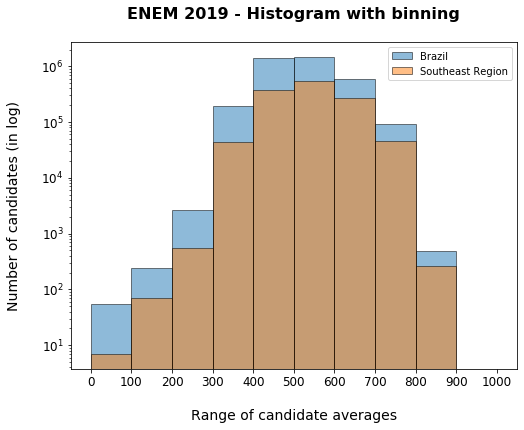

In [248]:
# Histogram as example of data reduction technique and visualization (data representation)

## Bin - considering the entire Brazil data (candidates' average)
bin_edges_BR = np.histogram_bin_edges(small_df["NOTA_MEDIA"], bins=10, range=(0, 1000))

## Bin - considering only Southeast region data (candidates' average)
bin_edges_SE = np.histogram_bin_edges(df_SE["NOTA_MEDIA"], bins=10, range=(0, 1000))

plt.figure(figsize=(8,6))
plt.hist(small_df["NOTA_MEDIA"], bins=bin_edges_BR, log=True, edgecolor="black", alpha=0.5, label="Brazil")
plt.hist(df_SE["NOTA_MEDIA"], bins=bin_edges_SE, log=True, edgecolor="black", alpha=0.5, label="Southeast Region")
plt.title("ENEM 2019 - Histogram with binning\n", fontsize=16, fontweight="bold")

plt.xticks(bin_edges_BR, fontsize=12)
plt.xticks(bin_edges_SE, fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel("\nRange of candidate averages", fontsize=14)
plt.ylabel("Number of candidates (in log)\n", fontsize=14)
plt.legend(loc='upper right')
# plt.savefig("histogram_ENEM_2019.png")
plt.show()